In [7]:
import cv2
from IPython.display import display
from PIL import Image

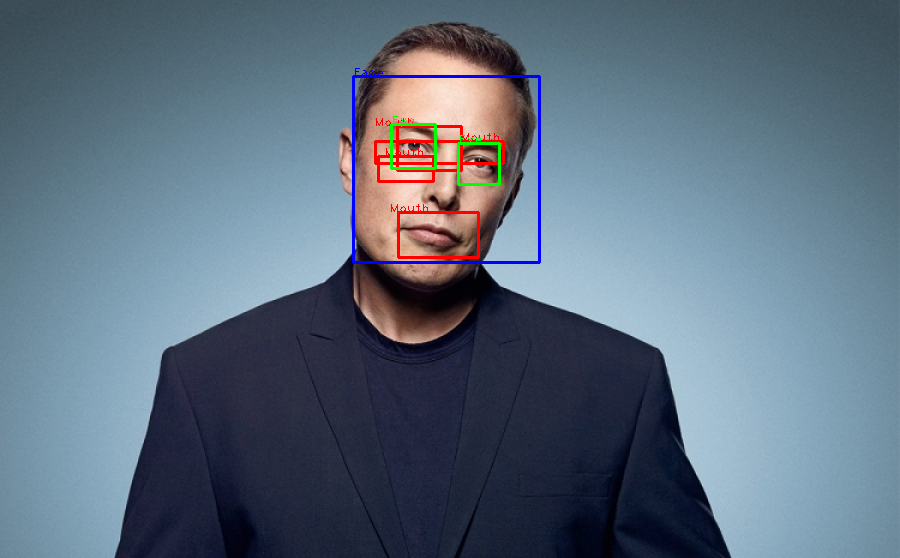

In [11]:
# load the cascades - path to a file with calculated parameters for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smileCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# list of images' paths
photo_paths = ['photo_1.jpg']

for photo_path in photo_paths:

    #read image
    img = cv2.imread(photo_path)

    # convert an image into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # detect faces on image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, 'Face', (x, y), 1, 0.8, (255, 0, 0), 1)

        roi_gray = gray[y : y + h, x : x + w]
        roi_color = img[y : y + h, x : x + w]

        # detect mouth on roi from detected faces
        mouth = smileCascade.detectMultiScale(roi_gray, scaleFactor=1.16, minNeighbors=4, flags=cv2.CASCADE_SCALE_IMAGE)
        for (mx, my, mw, mh) in mouth:
            cv2.rectangle(roi_color, (mh, my), (mx + mw, my + mh), (0, 0, 255), 2)
            cv2.putText(img, 'Mouth', (x + mx, y + my), 1, 0.8, (0, 0, 255), 1)

        # detect eyes on roi from detected faces
        eyes = eyeCascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
            cv2.putText(img, 'Eye', (x + ex, y + ey), 1, 0.8, (0, 255, 0), 1)

    # cv2.imshow('displaymywindows', img)
    # cv2.waitKey(0)   #wait for a keyboard input
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img))

    # cv2.destroyAllWindows()